NLP Project

In [ ]:
import numpy as np
import pandas as pd
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.stem.porter import *  
stemmer = PorterStemmer() 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\
Drive/Colab_Notebooks_UCI/Natural_Language_Processing/winemag-data-130k-v2.zip

Archive:  gdrive/MyDrive/Colab_Notebooks_UCI/Natural_Language_Processing/winemag-data-130k-v2.zip
replace winemag-data-130k-v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: winemag-data-130k-v2.csv  


In [ ]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
# Preprocessing

# Stopwords
stopwords = set(stopwords.words('english'))

# Detokenizer to combines tokens together
detokenizer = TreebankWordDetokenizer()

# Tokenizer and cleaning function
def clean_text(description):
  regex = '([A-Za-z]{2,15}){1}(?! /)'            
  description = re.findall(regex, description.lower())
  #description = word_tokenize(words)
  description = [token for token in description if token not in stopwords and token.isalpha()]
  return detokenizer.detokenize(description)


In [ ]:
# Apply Function

df["description"] = df["description"].apply(clean_text)
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,ripe fruity wine smooth still structured firm ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Wine Quality (Data Preprocessing)

In [ ]:
# Check for null values in description and points = none
df.T.apply(lambda x: x.isnull().sum(), axis = 1)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

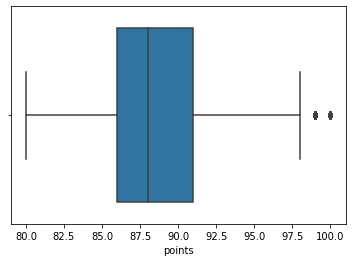

In [ ]:
# Identify outliers
sns.boxplot(df['points'])

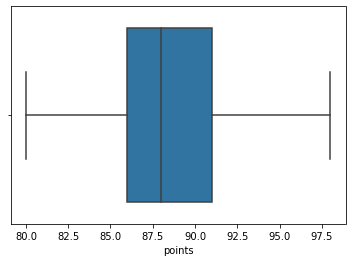

In [ ]:
# Drop outliers
df=df[df['points'] <=98]
sns.boxplot(df['points'])

In [ ]:
# Categorize wines into Good vs Excellent
def points_category(point):
  if(point<=86):
    return 'good'
  elif(point<=94):
    return 'very good'
  else:
     return 'excellent'


df['points_category'] = df['points'].apply(points_category)
df.groupby(df['points_category']).size()

points_category
excellent     2364
good         34560
very good    92995
dtype: int64

In [ ]:
good = df[df['points_category'] == 'good']
very_good = df[df['points_category'] == 'very good']
excellent = df[df['points_category'] == 'excellent']

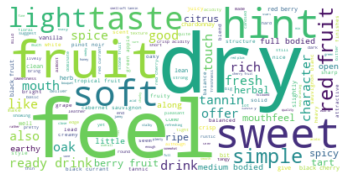

In [ ]:
import matplotlib.pyplot as plt

# Good word cloud
text = " ".join(review for review in good.description)
stopwords.update(["wine", "note", "finish", "palate", "flavor", "show", "nose", "aroma", "notes", "flavors", "aromas", "shows"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


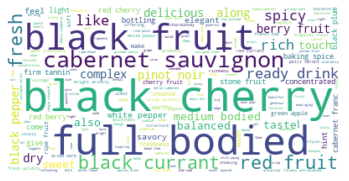

In [ ]:
# Very Good word cloud
text = " ".join(review for review in very_good.description)
stopwords.update(["wine", "note", "finish", "palate", "flavor", "show", "nose", "aroma", "notes", "flavors", "aromas", "shows"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


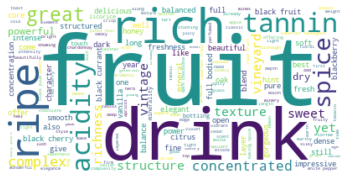

In [ ]:
# Excellent word cloud
text = " ".join(review for review in excellent.description)
stopwords.update(["wine", "note", "finish", "palate", "flavor", "show", "nose", "aroma", "notes", "flavors", "aromas", "shows"])s
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Looking at the price levels across wine quality categories**

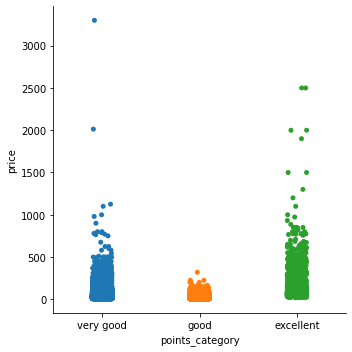

In [ ]:
# The higher the price, the better the quality
sns.catplot(x = 'points_category', y = 'price', data = df)

In [ ]:
# Select only relevant columns
df = df[["description", "points_category"]]
df.head(2)

,description,points_category
0,aromas include tropical fruit broom brimstone ...,very good
1,ripe fruity wine smooth still structured firm ...,very good


In [ ]:
# Preprocessing
def get_vector_feature_matrix(description):
    vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=700) 
    vector = vectorizer.fit_transform(description)
    return vector, vectorizer

vector, vectorizer = get_vector_feature_matrix(df['description'])

In [ ]:
print(vectorizer.get_feature_names())

['accent', 'accented', 'accents', 'accessible', 'acid', 'acidic', 'acidity', 'acids', 'add', 'adding', 'adds', 'aftertaste', 'age', 'aged', 'aging', 'alcohol', 'almond', 'alongside', 'ample', 'anise', 'ap', 'appeal', 'appealing', 'appellation', 'apple', 'apples', 'approachable', 'apricot', 'aroma', 'aromas', 'aromatic', 'asian', 'assertive', 'astringent', 'attractive', 'austere', 'away', 'backbone', 'backed', 'background', 'bacon', 'baked', 'baking', 'balance', 'balanced', 'balsamic', 'banana', 'barrel', 'barrels', 'based', 'basic', 'bean', 'beautiful', 'beautifully', 'beef', 'berries', 'berry', 'best', 'better', 'big', 'bit', 'bite', 'bitter', 'bitterness', 'black', 'blackberries', 'blackberry', 'blanc', 'blend', 'blended', 'blossom', 'blue', 'blueberry', 'boasts', 'bodied', 'body', 'bold', 'bone', 'bordeaux', 'bottle', 'bottling', 'bouquet', 'boysenberry', 'bracing', 'brambly', 'bread', 'bright', 'bring', 'brings', 'briny', 'brisk', 'broad', 'brooding', 'brown', 'burnt', 'butter', 'b

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['points_category'] = labelencoder.fit_transform(df['points_category'])

features=vector.todense()
label = df['points_category']

In [ ]:
label.value_counts()

2    92995
1    34560
0     2364
Name: points_category, dtype: int64

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)
y_train.value_counts()


2    65065
1    24238
0     1676
Name: points_category, dtype: int64

# Logistic Regression

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report  

In [ ]:
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model_lr = lr.fit(X_train, y_train)

In [ ]:
ypred_lr = model_lr.predict(X_test)

acc_lr = metrics.accuracy_score(y_test, ypred_lr)
cm_lr = metrics.confusion_matrix(y_test, ypred_lr)

print("Accuracy: ", acc_lr)
print("Confusion Matrix:\n", cm_lr)

Accuracy:  0.8241177677472302
Confusion Matrix:
 [[   75     1   664]
 [    0  6519  3803]
 [   71  2319 25540]]


# Decision Tree

In [ ]:
d_tree = tree.DecisionTreeClassifier()
model_tree = d_tree.fit(X_train, y_train)

In [ ]:
y_pred_tree = model_tree.predict(X_test)

acc_d = metrics.accuracy_score(y_test, y_pred_tree)
cm = metrics.confusion_matrix(y_test, y_pred_tree)

print("Accuracy: ", acc_d)
print("Confusion Matrix:\n", cm)

Accuracy:  0.743331965531391
Confusion Matrix:
 [[   72    42   626]
 [   31  5873  4418]
 [  444  4447 23039]]


# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(X_train, y_train)

In [ ]:
ypred_rf = model_rf.predict(X_test)

acc_rf = metrics.accuracy_score(y_test, ypred_rf)
cm_rf = metrics.confusion_matrix(y_test, ypred_rf)

print("Accuracy: ", acc_rf)
print("Confusion Matrix:\n", cm_rf)

Accuracy:  0.8290675010258515
Confusion Matrix:
 [[    9     0   731]
 [    0  5692  4630]
 [    0  1304 26626]]


In [ ]:
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

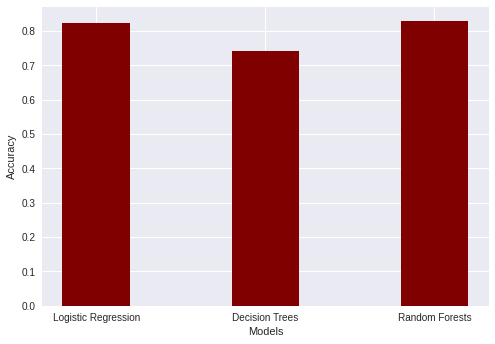

In [ ]:
accs = [acc_lr, acc_d, acc_rf]
models = ["Logistic Regression", "Decision Trees", "Random Forests"]
plt.bar(models, accs, width = 0.4, color="maroon")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()